In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving drug200-HDG.csv to drug200-HDG.csv


{'drug200-HDG.csv': b'Age,Sex,BP,Cholesterol,Na_to_K,Drug\r23,F,HIGH,HIGH,25.355,drugY\r47,M,LOW,HIGH,13.093,drugC\r47,M,LOW,HIGH,10.114,drugC\r28,F,NORMAL,HIGH,7.798,drugX\r61,F,LOW,HIGH,18.043,drugY\r22,F,NORMAL,HIGH,8.607,drugX\r49,F,NORMAL,HIGH,16.275,drugY\r41,M,LOW,HIGH,11.037,drugC\r60,M,NORMAL,HIGH,15.171,drugY\r43,M,LOW,NORMAL,19.368,drugY\r47,F,LOW,HIGH,11.767,drugC\r34,F,HIGH,NORMAL,19.199,drugY\r43,M,LOW,HIGH,15.376,drugY\r74,F,LOW,HIGH,20.942,drugY\r50,F,NORMAL,HIGH,12.703,drugX\r16,F,HIGH,NORMAL,15.516,drugY\r69,M,LOW,NORMAL,11.455,drugX\r43,M,HIGH,HIGH,13.972,drugA\r23,M,LOW,HIGH,7.298,drugC\r32,F,HIGH,NORMAL,25.974,drugY\r57,M,LOW,NORMAL,19.128,drugY\r63,M,NORMAL,HIGH,25.917,drugY\r47,M,LOW,NORMAL,30.568,drugY\r48,F,LOW,HIGH,15.036,drugY\r33,F,LOW,HIGH,33.486,drugY\r28,F,HIGH,NORMAL,18.809,drugY\r31,M,HIGH,HIGH,30.366,drugY\r49,F,NORMAL,NORMAL,9.381,drugX\r39,F,LOW,NORMAL,22.697,drugY\r45,M,LOW,HIGH,17.951,drugY\r18,F,NORMAL,NORMAL,8.75,drugX\r74,M,HIGH,HIGH,9.567,drugB

In [3]:
df = pd.read_csv('drug200-HDG.csv')
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [4]:
col_names = ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']
for col in col_names:
  print(df[col].value_counts())

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
from sklearn import preprocessing
le_ck=preprocessing.LabelEncoder()
le_ck.fit(['F','M'])
df['Sex']=le_ck.transform(df['Sex'])

le_ut=preprocessing.LabelEncoder()
le_ut.fit(['HIGH','LOW','NORMAL'])
df['BP']=le_ut.transform(df['BP'])

le_ja=preprocessing.LabelEncoder()
le_ja.fit(['HIGH','NORMAL'])
df['Cholesterol']=le_ut.transform(df['Cholesterol'])
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  drugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            2   14.020  drugX
199   40    0   1            2   11.349  drugX

[200 rows x 6 columns]


In [8]:
X=df.drop(['Drug'],axis=1)
y=df['Drug']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size=0.15 , random_state = 42)
X_train.shape, X_test.shape

((170, 5), (30, 5))

In [9]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)

predTree_train=Tree.predict(X_train)
hasil_train=pd.DataFrame ({'Predicted_risk':predTree_train,'Actual_risk':y_train})
print(hasil_train)

predTree_test=Tree.predict(X_test)
hasil_test=pd.DataFrame ({'Predicted_risk':predTree_test,'Actual_risk':y_test})
print(hasil_train)

    Predicted_risk Actual_risk
9            drugY       drugY
18           drugC       drugC
55           drugC       drugC
75           drugY       drugY
150          drugA       drugA
..             ...         ...
106          drugX       drugX
14           drugX       drugX
92           drugY       drugY
179          drugY       drugY
102          drugC       drugC

[170 rows x 2 columns]
    Predicted_risk Actual_risk
9            drugY       drugY
18           drugC       drugC
55           drugC       drugC
75           drugY       drugY
150          drugA       drugA
..             ...         ...
106          drugX       drugX
14           drugX       drugX
92           drugY       drugY
179          drugY       drugY
102          drugC       drugC

[170 rows x 2 columns]


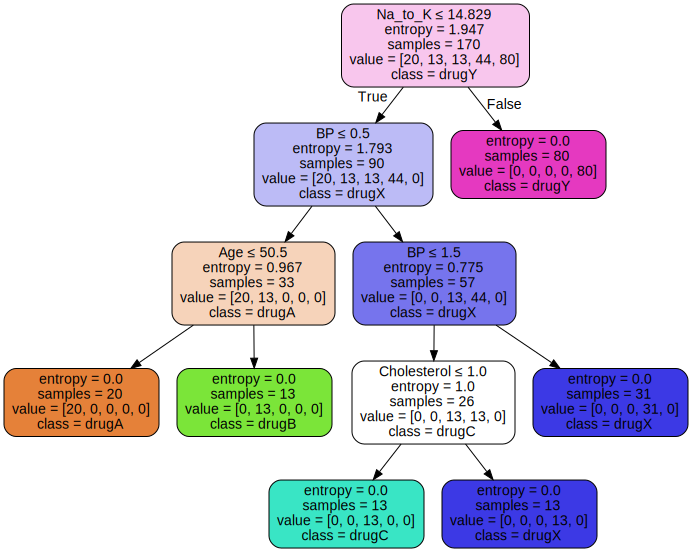

In [10]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(Tree,out_file=None,feature_names=X_train.columns,class_names=np.unique(y_train),filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph